### Data Scraping

In [ ]:
import json
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import random
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
nltk.download('stopwords')

titles = []
for i in range(498):
  temp_list = []
  try:
    list_1 = requests.get("https://api.pushshift.io/reddit/search/submission/?subreddit=finance&after={}d&before={}d&fields=title&sort=desc&sort_type=score&size=50".format(i+1, i)).json()['data']
  except:
    continue
  for keys in list_1:
    temp_list.append(keys['title'])
  text = ' '.join(temp_list)
  contentBlob = TextBlob(text).lower()
  n_tokens_content = len(contentBlob.words)
  n_unique_tokens = len(list(set(contentBlob.words)))
  content_sentiment_polarity = contentBlob.sentiment.polarity
  content_subjectivity = contentBlob.sentiment.subjectivity
  titles.append([498 - i, text, content_sentiment_polarity, content_subjectivity])
  print(i)

df = pd.DataFrame(titles, columns = ["Date", "Text", "Polarity", "Subjectivity"])

df

df.to_csv("News.csv")


### Data Preprocessing (RF)

In [4]:
from google.colab import drive
import os
drive.mount('/content/drive',force_remount=True)
cur_dir = "/content/drive/MyDrive/Academics/CS419 project/data/"
# change working directory to dataset folder
os.chdir(cur_dir)

Mounted at /content/drive


Run from here


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import re
from sklearn.impute import SimpleImputer

In [2]:
import nltk

In [5]:
df = pd.read_csv('Combined_News_DJIA.csv')

In [6]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [7]:
#divide in train and tes
train = df[df['Date']<'20150101']
test = df[df['Date'] > '20141231']

In [ ]:
#remove punctuation
#apart from alphabets we will replace every character with blank
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

In [ ]:
#renaming column
list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns = new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,b Rice Gives Green Light for Israel to Attack ...,b Announcing Class Action Lawsuit on Behalf of...,b So Russia and Georgia are at war and the N...,b China tells Bush to stay out of other countr...,b Did World War III start today,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,b Russia presses deeper into Georgia U S say...,b Abhinav Bindra wins first ever Individual Ol...,b U S ship heads for Arctic to define territ...,b Drivers in a Jerusalem taxi station threaten...,b The French Team is Stunned by Phelps and the...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,b Gorbachev Georgian military attacked the S...,b CNN use footage of Tskhinvali ruins to cover...,b Beginning a war as the Olympics were opening...,b pyramids as large as the Luxor stacked in...,b The Top Party Cities in the World,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s ac

In [ ]:
#converting hadlines to lower case
for index in new_Index:
    data[index] = data[index].str.lower()
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,b rice gives green light for israel to attack ...,b announcing class action lawsuit on behalf of...,b so russia and georgia are at war and the n...,b china tells bush to stay out of other countr...,b did world war iii start today,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge
1,b why wont america and nato help us if they w...,b bush puts foot down on georgian conflict,b jewish georgian minister thanks to israeli ...,b georgian army flees in disarray as russians ...,b olympic opening ceremony fireworks faked,b what were the mossad with fraudulent new zea...,b russia angered by israeli military sale to g...,b an american citizen living in s ossetia blam...,b welcome to world war iv now in high definit...,b georgia s move a mistake of monumental prop...,b russia presses deeper into georgia u s say...,b abhinav bindra wins first ever individual ol...,b u s ship heads for arctic to define territ...,b drivers in a jerusalem taxi station threaten...,b the french team is stunned by phelps and the...,b israel and the us behind the georgian aggres...,b do not believe tv neither russian nor geor...,b riots are still going on in montreal canada...,b china to overtake us as largest manufacturer,b war in south ossetia pics,b israeli physicians group condemns state tort...,b russia has just beaten the united states ov...,b perhaps the question about the georgia r...,b russia is so much better at war,b so this is what it s come to trading sex fo...


In [ ]:
' '.join(str(x) for x in data.iloc[1, 0:25])  #example

'b why wont america and nato help us  if they wont help us now  why did we help them in iraq   b bush puts foot down on georgian conflict  b jewish georgian minister  thanks to israeli training  we re fending off russia   b georgian army flees in disarray as russians advance   gori abandoned to russia without a shot fired  b olympic opening ceremony fireworks  faked   b what were the mossad with fraudulent new zealand passports doing in iraq   b russia angered by israeli military sale to georgia  b an american citizen living in s ossetia blames u s  and georgian leaders for the genocide of innocent people  b welcome to world war iv  now in high definition   b georgia s move  a mistake of monumental proportions   b russia presses deeper into georgia  u s  says regime change is goal  b abhinav bindra wins first ever individual olympic gold medal for india  b  u s  ship heads for arctic to define territory  b drivers in a jerusalem taxi station threaten to quit rather than work for their 

In [ ]:
#all the sentences in the form of list

headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))

headlines[5]

'b mom of missing gay man  too bad he s not a    year old cheerleader  then they d still be looking for him  b russia  u s  poland missile deal won t go  unpunished   b the government has been accused of creating laws that have a chilling effect on freedom of expression in the uk in a critical report from the un s committee on human rights  b the italian government has lashed out at an influential catholic magazine which suggested fascism might be resurfacing within the government   b gorbachev  georgia started conflict in s  ossetia  b china fakes more than your girlfriend   ethnic minority  children at olympics ceremony were fake too   b the un s criticism of freedom of expression in the uk are valid  b russian general threatens nuclear strike on poland as bush demands moscow withdraws from georgia  b russia can inspect polish missile defence site  b russia georgia conflict fueled by rush to control caspian energy resources  b business week  victory in georgia gives russia the edge i

In [ ]:
len(headlines)

1863

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# implememt BAG OF WORDS
countVector = CountVectorizer(ngram_range=(2,2))
#ngram(2,2) means it will combine the 2 words together and assign the value

trainDataset = countVector.fit_transform(headlines)

In [ ]:
trainDataset.shape

(1863, 403977)

### Random Forest Classifier

In [ ]:
randomClassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomClassifier.fit(trainDataset, train['Label'])

In [ ]:
testTransform =[]
for row in range(0, len(test.index)):
    testTransform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))
    
test_dataset = countVector.transform(testTransform)
predictions = randomClassifier.predict(test_dataset)

In [ ]:
test.loc[1611, :]

Date                                            2015-01-02
Label                                                    1
Top1     Most cases of cancer are the result of sheer b...
Top2     Iran dismissed United States efforts to fight ...
Top3     Poll: One in 8 Germans would join anti-Muslim ...
Top4     UK royal family's Prince Andrew named in US la...
Top5     Some 40 asylum-seekers refused to leave the bu...
Top6     Pakistani boat blows self up after India navy ...
Top7     Sweden hit by third mosque arson attack in a week
Top8            940 cars set alight during French New Year
Top9     Salaries for top CEOs rose twice as fast as av...
Top10    Norway violated equal-pay law, judge says: Jud...
Top11    Imam wants radical recruiters of Muslim youth ...
Top12    Saudi Arabia beheaded 83 people in 2014, the m...
Top13    'A living hell' for slaves on remote South Kor...
Top14    Worlds 400 richest get richer, adding $92bn in...
Top15    Rental Car Stereos Infringe Copyright, Music R.

In [ ]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[131  55]
 [  1 191]]
0.8518518518518519
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       186
           1       0.78      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



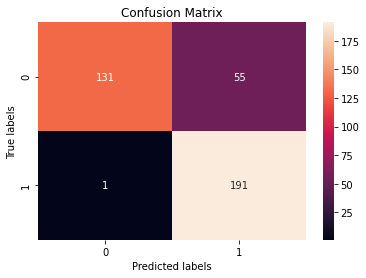

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(test['Label'], predictions)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['True', 'Predicted']); ax.yaxis.set_ticklabels(['True', 'Predicted']);

In [ ]:
tr = pd.DataFrame(trainDataset)

### LSTM

In [9]:
df = pd.read_csv('Combined_News_DJIA.csv')

In [10]:
#remove punctuation
#apart from alphabets we will replace every character with blank
data = df.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

In [11]:
#renaming column
list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns = new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,b Rice Gives Green Light for Israel to Attack ...,b Announcing Class Action Lawsuit on Behalf of...,b So Russia and Georgia are at war and the N...,b China tells Bush to stay out of other countr...,b Did World War III start today,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,b Russia presses deeper into Georgia U S say...,b Abhinav Bindra wins first ever Individual Ol...,b U S ship heads for Arctic to define territ...,b Drivers in a Jerusalem taxi station threaten...,b The French Team is Stunned by Phelps and the...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,b Gorbachev Georgian military attacked the S...,b CNN use footage of Tskhinvali ruins to cover...,b Beginning a war as the Olympics were opening...,b pyramids as large as the Luxor stacked in...,b The Top Party Cities in the World,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s ac

In [12]:
#converting hadlines to lower case
for index in new_Index:
    data[index] = data[index].str.lower()
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,b rice gives green light for israel to attack ...,b announcing class action lawsuit on behalf of...,b so russia and georgia are at war and the n...,b china tells bush to stay out of other countr...,b did world war iii start today,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge
1,b why wont america and nato help us if they w...,b bush puts foot down on georgian conflict,b jewish georgian minister thanks to israeli ...,b georgian army flees in disarray as russians ...,b olympic opening ceremony fireworks faked,b what were the mossad with fraudulent new zea...,b russia angered by israeli military sale to g...,b an american citizen living in s ossetia blam...,b welcome to world war iv now in high definit...,b georgia s move a mistake of monumental prop...,b russia presses deeper into georgia u s say...,b abhinav bindra wins first ever individual ol...,b u s ship heads for arctic to define territ...,b drivers in a jerusalem taxi station threaten...,b the french team is stunned by phelps and the...,b israel and the us behind the georgian aggres...,b do not believe tv neither russian nor geor...,b riots are still going on in montreal canada...,b china to overtake us as largest manufacturer,b war in south ossetia pics,b israeli physicians group condemns state tort...,b russia has just beaten the united states ov...,b perhaps the question about the georgia r...,b russia is so much better at war,b so this is what it s come to trading sex fo...


In [13]:
#all the sentences in the form of list

headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))

headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [14]:
from collections import Counter
all_text2 = ' '.join(headlines)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [15]:
count_words

Counter({'b': 12036,
         'georgia': 138,
         'downs': 5,
         'two': 1193,
         'russian': 1223,
         'warplanes': 44,
         'as': 4419,
         'countries': 538,
         'move': 228,
         'to': 26484,
         'brink': 57,
         'of': 23111,
         'war': 1598,
         'breaking': 97,
         'musharraf': 7,
         'be': 3219,
         'impeached': 2,
         'russia': 1709,
         'today': 374,
         'columns': 2,
         'troops': 510,
         'roll': 20,
         'into': 1453,
         'south': 961,
         'ossetia': 38,
         'footage': 124,
         'from': 4423,
         'fighting': 204,
         'youtube': 86,
         'tanks': 98,
         'are': 3538,
         'moving': 69,
         'towards': 101,
         'the': 32018,
         'capital': 263,
         'which': 769,
         'has': 4685,
         'reportedly': 138,
         'been': 1815,
         'completely': 60,
         'destroyed': 128,
         'by': 5150,
         '

In [16]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [17]:
len(vocab_to_int)

33271

In [18]:
headlines_int = []
for h in headlines:
    r = [vocab_to_int[w] for w in h.split()]
    headlines_int.append(r)
print (headlines_int[0:3])

[[7, 934, 10351, 74, 70, 2640, 17, 202, 536, 2, 2152, 4, 51, 7, 1330, 8736, 2, 22, 15484, 7, 47, 304, 15485, 4, 213, 4668, 55, 95, 2953, 1048, 16, 616, 1508, 7, 70, 1314, 19, 1848, 1268, 1, 467, 4, 95, 2953, 125, 14, 935, 43, 2057, 1016, 12, 2954, 2689, 209, 7, 267, 124, 650, 15, 6729, 41, 162, 218, 28, 60, 11, 2690, 5, 158, 50, 102, 27, 650, 6, 38, 245, 1148, 7, 70, 1314, 21, 2226, 95, 2953, 9422, 934, 3684, 107, 74, 70, 1117, 7, 1330, 934, 8737, 95, 2953, 47, 674, 18, 119, 4133, 10, 147, 8, 1315, 7, 1, 2554, 19855, 2852, 19, 1148, 79, 5, 7148, 15486, 19856, 14, 43, 476, 2, 53, 79, 30, 22, 1767, 630, 6115, 131, 178, 38, 1680, 181, 18, 7, 2954, 213, 5606, 16, 8, 19857, 467, 13135, 1107, 803, 3249, 42, 63, 199, 7, 440, 1, 41, 8, 15487, 934, 9, 51, 15, 47, 7, 3074, 921, 940, 1164, 9, 34, 2, 98, 61, 28, 41, 8, 14, 59, 4806, 26, 64, 78, 6116, 7, 6117, 1192, 503, 1681, 10, 3685, 4, 193, 183, 48, 1, 1434, 7, 147, 47, 6, 934, 19, 20, 51, 6, 1, 5607, 8, 195, 626, 11, 2190, 9423, 4, 1, 1005, 11

In [19]:
encoded_labels = np.array(df['Label'])
encoded_labels

array([0, 1, 0, ..., 1, 1, 1])

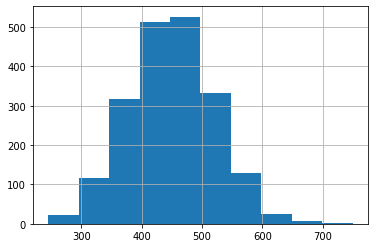

count    1989.000000
mean      448.945701
std        70.551814
min       245.000000
25%       399.000000
50%       449.000000
75%       497.000000
max       750.000000
dtype: float64

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
headlines_len = [len(x) for x in headlines_int]
pd.Series(headlines_len).hist()
plt.show()
pd.Series(headlines_len).describe()

In [21]:
len(headlines_int)

1989

In [22]:
headlines_int = [ headlines_int[i] for i, l in enumerate(headlines_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(headlines_len) if l> 0 ]

In [23]:
def pad_features(headlines_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(headlines_int), seq_length), dtype = int)
    
    for i, headline in enumerate(headlines_int):
        headline_len = len(headline)
        
        if headline_len <= seq_length:
            zeroes = list(np.zeros(seq_length-headline_len))
            new = zeroes+headline
        elif headline_len > seq_length:
            new = headline[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [24]:
features = pad_features(headlines_int,100)

In [ ]:
print(features[0:10])

In [26]:
split_frac = 0.8
len_feat = len(features)
train_x = np.array(features[0:int(split_frac*len_feat)])
train_y = np.array(encoded_labels[0:int(split_frac*len_feat)])
remaining_x = np.array(features[int(split_frac*len_feat):])
remaining_y = np.array(encoded_labels[int(split_frac*len_feat):])
valid_x = np.array(remaining_x[0:int(len(remaining_x)*0.5)])
valid_y = np.array(remaining_y[0:int(len(remaining_y)*0.5)])
test_x = np.array(remaining_x[int(len(remaining_x)*0.5):])
test_y = np.array(remaining_y[int(len(remaining_y)*0.5):])

In [27]:
import tensorflow as tf

In [28]:
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout

In [130]:
embed_dim = 8

model = Sequential()
model.add(Embedding(input_dim=len(vocab_to_int),
        output_dim=8,
        # Use masking to handle the variable sequence lengths
        mask_zero=True))
model.add(Bidirectional(LSTM(8)))
model.add(Dropout(0.5))
model.add(Dense(8,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = [tf.keras.metrics.BinaryAccuracy()
])
print(model.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 8)           266168    
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 16)                1088      
_________________________________________________________________
dropout_40 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_41 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 9         
Total params: 267,401
Trainable params: 267,401
Non-trainable params: 0
_______________________________________________

In [ ]:
model.fit(train_x,train_y, epochs = 10, batch_size=10, validation_split=0.3)

In [106]:
y_pred = model.predict(test_x)

In [107]:
for i in range(len(y_pred)):
  y_pred[i] = 1 if y_pred[i]>0.5 else 0

In [108]:
y_pred  = np.array(y_pred)

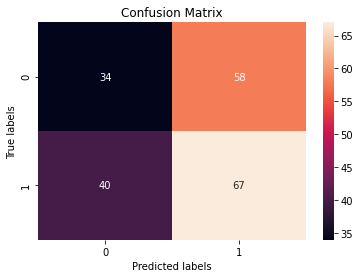

In [109]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(test_y, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['True', 'Predicted']); ax.yaxis.set_ticklabels(['True', 'Predicted']);

# Logistic Regression

In [132]:
train_lr = train['Label']
test_lr = test['Label']

In [133]:
train_lr

0       0
1       1
2       0
3       0
4       1
       ..
1858    0
1859    0
1860    1
1861    0
1862    0
Name: Label, Length: 1863, dtype: int64

In [134]:
from textblob import TextBlob
a = TextBlob ('Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.')
a.sentiment

Sentiment(polarity=0.0, subjectivity=1.0)

In [ ]:
for i in range(2, 27):
  df.iloc[:,i] = df.iloc[:,i].str.replace('b', '', 1)

In [ ]:
str(df.iloc[1,3])

"'Bush puts foot down on Georgian conflict'"

In [ ]:
polarity = []
subjectivity = []
for i in range(df.shape[0]):
  pol_temp = []
  sub_temp = []
  for j in range(2,27):
    pol_temp.append(TextBlob(str(df.iloc[i,j])).sentiment.polarity)
    sub_temp.append(TextBlob(str(df.iloc[i,j])).sentiment.subjectivity)
  polarity.append(pol_temp)
  subjectivity.append(sub_temp)

In [ ]:
np_polarity = np.array(polarity)
np_subjectivity = np.array(subjectivity)

In [ ]:
np_polarity.shape

(1989, 25)

In [ ]:
polarity_mean = []
subjectivity_mean = []
for i in range(np_polarity.shape[0]):
  polarity_mean.append(np.mean(np_polarity[i]))
  subjectivity_mean.append(np.mean(np_subjectivity[i]))

In [ ]:
np_polarity_mean = np.array(polarity_mean)
np_subjectivity_mean = np.array(subjectivity_mean)

In [ ]:
# This is the training data
np_polarity_mean
np_subjectivity_mean

array([0.17161087, 0.18416364, 0.36391198, ..., 0.22020469, 0.19242063,
       0.19666667])

In [ ]:
labels = df['Label']

In [ ]:
labels = np.array(labels)

In [ ]:
labels.shape

(1989,)

In [ ]:
# train-test split
train_pol = np_polarity_mean[:int(0.8*np_polarity_mean.shape[0])]
test_pol = np_polarity_mean[int(0.8*np_polarity_mean.shape[0]):]
train_sub = np_subjectivity_mean[:int(0.8*np_subjectivity_mean.shape[0])]
test_sub = np_subjectivity_mean[int(0.8*np_subjectivity_mean.shape[0]):]
train_labels = labels[:int(0.8*labels.shape[0])]
test_labels = labels[int(0.8*labels.shape[0]):]

In [ ]:
test_labels.shape

(398,)

In [ ]:
feature_matrix_train = np.array([train_pol, train_sub])
feature_matrix_test = np.array([test_pol, test_sub])

In [ ]:
feature_matrix_train = np.transpose(feature_matrix_train)
feature_matrix_test = np.transpose(feature_matrix_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(feature_matrix_train, train_labels)

In [ ]:
list(clf.predict(feature_matrix_train)).count(1)

1591

In [ ]:
y_pred = clf.predict(feature_matrix_test)

In [ ]:
clf.score(feature_matrix_test, test_labels)

0.507537688442211

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test_labels, y_pred)

array([[  0, 196],
       [  0, 202]])